# Risk Assessment in Loan Data

The practice of loans has existed for years. However, till today, the main issue faced is the risk of the borrower of the loan being unable to pay back the borrowed amount. 

Therefore, with **Risk Assessment**, it intended to assess the risk of each borrower's application carefully to ensure that not only will they be able to pay back but also enable the bank to better price customers and control losses.

Hence this study intended to use a repository of historical data on past customers' loan payment behaviour and utilize this with prediction models 
1. to predict the likelihood of a given individual being able to repay their loan based on their payment pattern and profile, and
2. to identify the customer group with the lowest risk of loan defaults, which the marketing team can put in efforts to target and attract these groups of customer.

In [ ]:
# Install all dependencies
%pip install -r ../requirements.txt

### Import Libraries and Dependencies

In [47]:
import sys
sys.path.append('../src/')

In [48]:
# Import libraries
import pandas as pd
import numpy as np

# Import custom plots
from customPlots.plotting import plot_multiple_hist

In [49]:
# Load dataset
loan_df = pd.read_csv('../data/loan.csv')
payment_df = pd.read_csv('../data/payment.csv')
clarify_df = pd.read_csv('../data/clarity_underwriting_variables.csv')

C:\Users\Gregory\AppData\Local\Temp\ipykernel_18156\2566802878.py:4: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  clarify_df = pd.read_csv('../data/clarity_underwriting_variables.csv')


In [50]:
loan_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [51]:
payment_df.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [52]:
clarify_df.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


# Exploratory Data Analysis

In this stage, plots and diagrams are used to further understand the dataset and identify potential features that can be further cleaned and procesed to remove noise.

## Analysis on load_df

In [53]:
loan_df.shape

(577682, 19)

In [54]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

In [55]:
print(f'Num of Missing Value')
for column in loan_df.columns:
    print(f'{column}: {loan_df[column].isnull().sum()}')

Num of Missing Value
loanId: 256
anon_ssn: 0
payFrequency: 1273
apr: 3922
applicationDate: 0
originated: 0
originatedDate: 531638
nPaidOff: 24
approved: 0
isFunded: 0
loanStatus: 391
loanAmount: 2250
originallyScheduledPaymentAmount: 0
state: 132
leadType: 0
leadCost: 0
fpStatus: 525959
clarityFraudId: 219989
hasCF: 0


In [56]:
print(f'Num of Duplicated Rows')
loan_df.duplicated().value_counts()

Num of Duplicated Rows


False    577682
Name: count, dtype: int64

### General Analysis

Based of the initial analysis, we can observe that the loan dataset has loaded with 577682 rows and 19 columns. Hence of the 19 columns, 2 are boolean, 4 are of the datatype of float, 3 of the int datatype and 10 of the object datatype. Suggesting that there are **12 categorical attributes and 7 numerical attributes**. 

However there is **presence of missing values** in several of the attributes and which requires further cleaning. On the other hand, there is **no presence of duplicated rows** that needs to be dropped.

### Numerical Feature Analysis

In [57]:
num_data = loan_df.select_dtypes(include=["int","float"])
num_data.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577658.000000,577682.000000,575432.000000,577682.000000,577682.000000,577682.000000
mean,553.080972,0.037887,0.067480,514.245084,1428.897209,7.854389,0.619187
std,110.046159,0.333366,0.250852,320.939929,925.009141,12.853451,0.485587
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.640000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.250000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


In [58]:
# Skewness
num_data.skew()

apr                                 -1.337621
nPaidOff                            19.180709
isFunded                             3.448423
loanAmount                           5.307558
originallyScheduledPaymentAmount     4.702820
leadCost                             5.986533
hasCF                               -0.490899
dtype: float64

In [59]:
# Kurtosis
num_data.kurtosis()

apr                                   1.417353
nPaidOff                            658.344536
isFunded                              9.891658
loanAmount                           36.832998
originallyScheduledPaymentAmount     34.834395
leadCost                             55.873243
hasCF                                -1.759024
dtype: float64

In [60]:
# Coefficient of Variation
(num_data.std()/num_data.mean())*100

apr                                  19.896935
nPaidOff                            879.885275
isFunded                            371.742149
loanAmount                           62.409917
originallyScheduledPaymentAmount     64.735877
leadCost                            163.646733
hasCF                                78.423395
dtype: float64

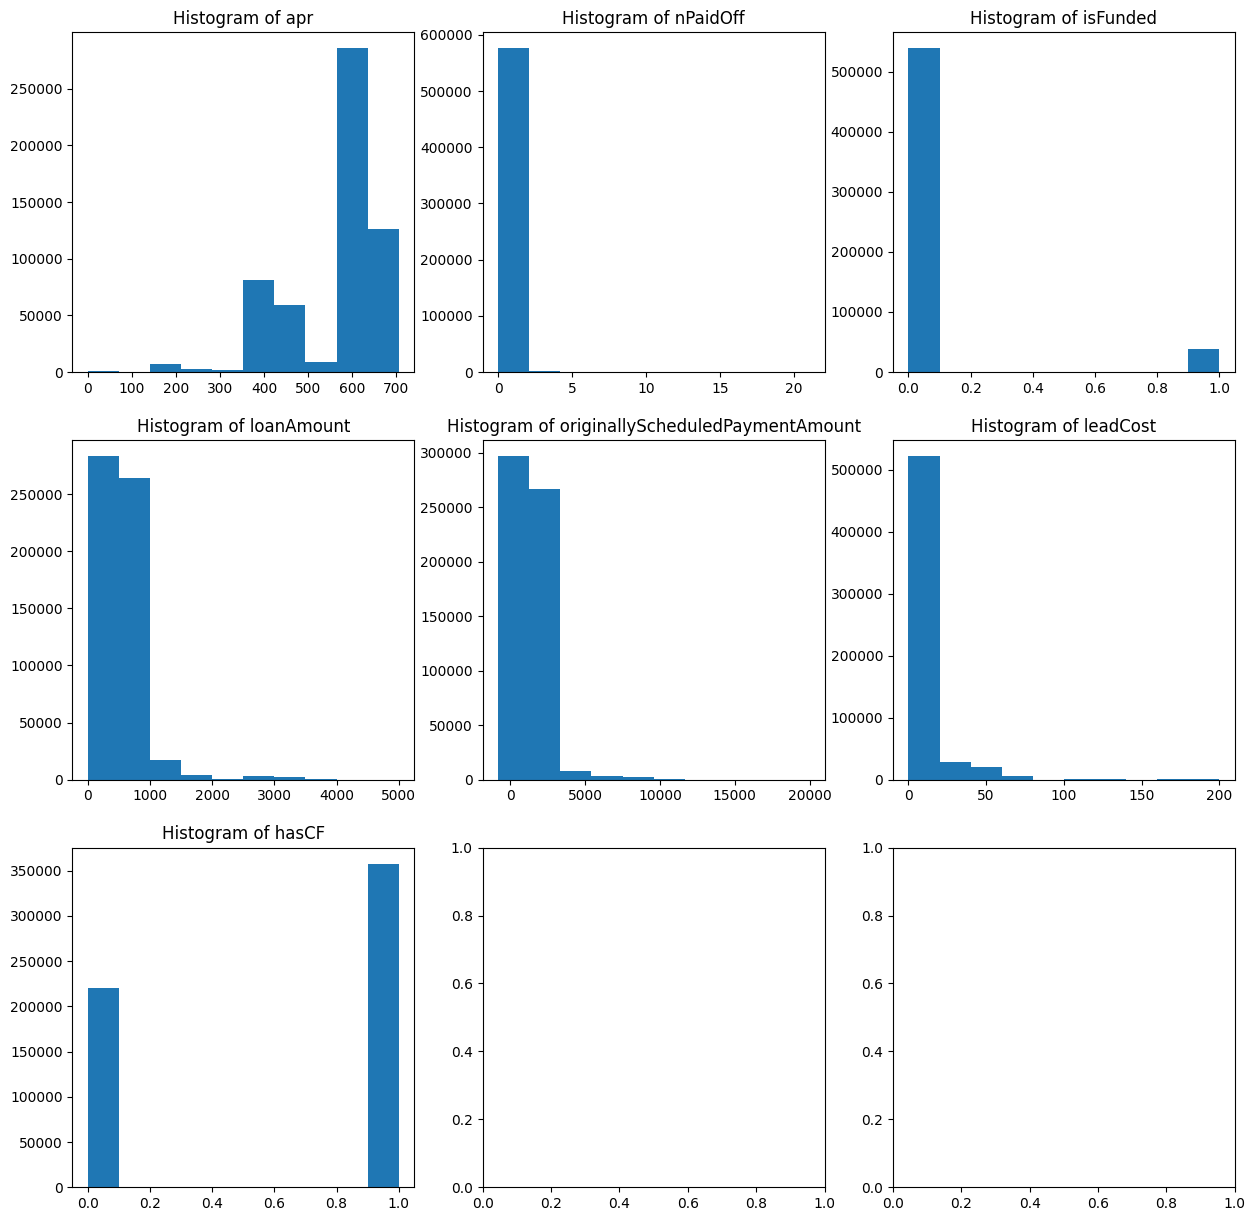

In [61]:
plot_multiple_hist(num_data, num_data.columns)

Below summarises the characteristics of each the attribute

**apr**
- Missing value of 3922
- Range of Value from 0 to 705.59
- Skewness of -1.33: Significantly skewed to the left
- Kurtosis of 1.42: Heavy tailed
- CV of 19.90: Moderate Variability

**nPaidOff**
- Missing value of 24
- Range of Value from 0 to 21
- Skewness of 19.18: Significantly skewed to the right
- Kurtosis of 658.34: Heavy tailed
- CV of 879.86: High Variability

**isFunded**
- No Missing value
- Range of Value either 0 or 1
- Skewness of 3.45: Significantly skewed to the right
- Kurtosis of 9.89: Heavy tailed
- CV of 371.74: High Variability

**loanAmount**
- Missing value of 2250
- Range of Value from 0 to 5000
- Skewness of 5.31: Significantly skewed to the right
- Kurtosis of 36.83: Heavy tailed
- CV of 62.41: High Variability

**originallyScheduledPaymentAmount**
- No Missing value
- Range of Value from -816.71 to 19963.63
- Skewness of 4.70: Significantly skewed to the right
- Kurtosis of 34.83: Heavy tailed
- CV of 64.74: High Variability

**leadCost**
- No Missing value
- Range of Value from 0 to 200
- Skewness of 5.99: Significantly skewed to the right
- Kurtosis of 55.87: Heavy tailed
- CV of 163.65: High Variability

**hasCF**
- No Missing value
- Range of Value either 0 or 1
- Skewness of -0.49: Approximately Symmetric
- Kurtosis of -1.76: Flat tailed
- CV of 78.42: High Variability

Based on the findings, only **apr, nPaidOff, and loanAmount** require imputation to treat the missing value. Hence for **nPaidOff**, we will impute the missing value with 0 to indicate that the applicant has not paid off any loan in the past. For **apr and loanAmount**, we will drop the records of the missing values because these information are unique and cant be derived from another feature.

Following, for the features that are significantly skewed, we will perform their respective transformation to normalize the data. 

Besides that, for features that are heavy tailed and high variability, we will perform the appropriate data binning and data cleaning to treat the variability and outliers present.

For **isFunded and hasCF** they will not be preprocessed as they are boolean (containing only two values of 0 and 1).

### Categorical Feature Analysis

In [62]:
char_data = loan_df.select_dtypes(include=["object","bool"])

# data distribution
for column in char_data.columns:
    print(f'{char_data[column].value_counts()}\n')

loanId
LL-I-07399092    1
LL-I-09120818    1
LL-I-12495837    1
LL-I-09315207    1
LL-I-07105524    1
                ..
LL-I-18326270    1
LL-I-14232965    1
LL-I-06403601    1
LL-I-10713224    1
LL-I-04733921    1
Name: count, Length: 577426, dtype: int64

anon_ssn
c8bb49de1f8ff99d2ecddfb7037dc66e    35
0b87684b60c8b8f5d0bd40eb5811cd50    20
f971898a3c70e4c3c316cb4bc48b6e2e    18
6f0e71bc16f634fafcf5337cecdfb25e    16
64cd38e9cd1e06ed480b5e607494ce57    15
                                    ..
9e28174874e0ddfaab268a6fda20f419     1
ba2f64a44344fcf8b5f0c4076bb6777f     1
ebe6ec6901aa8f9f59520ac4e65e0142     1
d3c1943189c453ce5149dc5c7c921f06     1
d7e55e85266208ac4c353f42ebcde5ca     1
Name: count, Length: 459393, dtype: int64

payFrequency
B    316654
W    137188
M     59092
I     33787
S     29688
Name: count, dtype: int64

applicationDate
2017-01-03T18:05:40.811000    3
2016-08-19T14:07:17.373000    2
2016-08-11T03:12:23.616000    2
2016-09-12T16:56:05.319000    2
2016-11-29T23:27

Below summarises the characteristics of each the attribute

**anon_ssn**
- No Missing Value
- Unique ID

**payFrequency**
- Missing value of 1273
- Value of B, W, M, I, S
- Highest frequency of B

**originated**
- No Missing value
- Value of True, False
- Highest frequency of False

**approved**
- No Missing Value
- Value of True, False
- Highest frequency of False

**loanStatus**
- Missing value of 391
- 21 different status
- Highest frequency of Withdrawn Application

**state**
- Missing value of 132
- 44 different states
- Highest frequency of OH

**leadType**
- No Missing value
- 10 different leads
- Highest frequency of bvMandatory

**fpStatus**
- Missing value of 525959
- 8 different status
- Highest frequency of Checked

**clarityFraudID**
- Missing value of 219989
- Unique ID

Based on the findings, **payFrequency, state, leadType, loanStatus and fpStatus** require encoding to convert their values from categorical data to discrete numerical ones.

For **clarityFrauidID**, it has too many missing value which can not be imputed due to its uniqueness. Therefore will be dropped. For the remaining missing value features, they will be either treated with the mode or the median value.

### Data Understanding

In [64]:
loan_df[['originated','approved','isFunded']].value_counts()

originated  approved  isFunded
False       False     0           531674
True        True      1            38982
            False     0             5972
            True      0             1052
False       True      0                2
Name: count, dtype: int64

From the above, we can understand that in order to get funded, the loans need to be \
*(1) originated -> (2) approved -> (3) funded*

Therefore in the preprocessing, we shall remove all the records where isFunded is 0 so that we can only perform analysis on the funded loans.

**Additionally, the columns of originated, approved and isFunded can be dropped since they are all True**

In [65]:
loan_df[loan_df['isFunded'] == 1][['loanStatus']].value_counts()

loanStatus                 
Paid Off Loan                  11427
External Collection            11334
New Loan                        8112
Internal Collection             5564
Returned Item                   1182
Settlement Paid Off              708
Settled Bankruptcy               325
Pending Paid Off                 169
Charged Off Paid Off             159
Charged Off                        1
Settlement Pending Paid Off        1
Name: count, dtype: int64

We will also drop the records of **loanStatus** that are New loan and Pending, to only analyse on the loans where the whole payment cycle of the loan has been completed.

## Analysis on payment_df

In [68]:
payment_df.shape

(689364, 9)

In [69]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      525307 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [74]:
# sample rows
payment_df[payment_df['loanId'] == 'LL-I-00000021']

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
5,LL-I-00000021,6,False,2015-02-27T05:00:00,51.97,117.64,169.61,Checked,NaN
6,LL-I-00000021,7,False,2015-03-13T04:00:00,61.54,108.07,169.61,Checked,NaN
7,LL-I-00000021,8,False,2015-03-27T04:00:00,72.87,96.74,169.61,Checked,NaN
8,LL-I-00000021,9,False,2015-04-10T04:00:00,86.29,83.32,169.61,Checked,NaN
9,LL-I-00000021,10,False,2015-04-24T04:00:00,102.17,67.44,169.61,Rejected,R01


In [81]:
# sample rows
payment_df[payment_df['loanId'] == 'LL-I-00000231']

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
13,LL-I-00000231,1,False,2014-12-11T05:00:00,0.00,84.16,84.16,Checked,NaN
14,LL-I-00000231,2,False,2014-12-26T05:00:00,27.20,147.28,174.48,Checked,NaN
15,LL-I-00000231,3,False,2015-01-08T05:00:00,32.20,142.28,174.48,Rejected,R01
16,LL-I-00000231,4,False,2015-01-22T05:00:00,38.13,136.35,174.48,Rejected,R01
17,LL-I-00000231,5,False,2015-02-06T05:00:00,45.15,129.33,174.48,Cancelled,NaN
18,LL-I-00000231,6,False,2015-02-06T05:00:00,45.15,129.33,174.48,NaN,NaN
19,LL-I-00000231,7,False,2015-02-20T05:00:00,53.47,121.01,174.48,Cancelled,NaN
20,LL-I-00000231,8,False,2015-02-20T05:00:00,53.47,121.01,174.48,NaN,NaN
21,LL-I-00000231,9,False,2015-03-06T05:00:00,63.31,111.17,174.48,Cancelled,NaN
22,LL-I-00000231,10,False,2015-03-06T05:00:00,63.31,111.17,174.48,NaN,NaN


In [71]:
payment_df.describe()

,installmentIndex,principal,fees,paymentAmount
count,689364.000000,689364.000000,689364.000000,689364.000000
mean,10.553222,45.557543,67.003994,112.680232
std,8.049530,81.724683,59.789510,105.783710
min,1.000000,-303.370000,-42.560000,-337.700000
25%,5.000000,13.180000,28.820000,56.810000
50%,9.000000,27.610000,51.300000,86.340000
75%,14.000000,53.380000,86.440000,135.090000
max,105.000000,4000.000000,1257.710000,4063.600000


In [70]:
payment_df['paymentStatus'].value_counts()

paymentStatus
Cancelled                  270334
Checked                    209621
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: count, dtype: int64

The payments records can be aggregated and grouped using the **loanId** with the **paymentStatus**. Hence to reduce the data range through data binning of the paymentStatus, where 
1. Paid: Checked
2. Pending: Pending, None, Rejected Awaiting Retry
3. Missed: Rejected, Skipped
4. Cancelled

Then the total principal, fees, and payment amount can be computed for each paymentStatus.

## Analysis on clarify_df

In [82]:
clarify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  49750

In [83]:
clarify_df.shape

(49752, 54)

Hence as analysed in loan_df, due to it having high missing value of the foreign key (**clarityFraudId**) used in the join, it then makes it difficult to impute and treat the missing value since the fk is unique. Therefore this dataframe will not be used in the analysis and only the loan_df and payment_df is used.